In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data_new=pd.read_csv(r'C:\Users\my pc\data_num.csv')

In [3]:
data_new

,Unnamed: 0,popularity,runtime,vote_average,vote_count,count_genres,count_company,count_spoken,count_country,sentiment_score,VIDEO FE,STATUS FE,LANGUAGE FE,release_year_minus_current_year
0,0,6.650000,73.0,6.8,134.0,3,1,2,1,-0.6479,0.946252,0.988579,0.003162,33.000000
1,1,6.200000,74.0,7.2,132.0,2,1,3,1,-0.5994,0.946252,0.988579,0.003162,35.000000
2,2,8.300000,98.0,5.7,1936.0,2,2,1,1,-0.2960,0.946252,0.988579,0.562853,26.000000
3,3,6.940000,110.0,6.4,191.0,3,3,1,2,-0.9403,0.946252,0.988579,0.562853,28.000000
4,4,1.650000,80.0,7.4,14.0,1,1,5,1,0.9552,0.946252,0.988579,0.562853,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656070,656070,0.751314,2.0,0.0,0.0,0,0,0,0,0.0000,0.946252,0.988579,0.562853,25.594724
656071,656071,0.751314,105.0,0.0,0.0,0,0,0,0,0.0258,0.946252,0.988579,0.562853,25.594724
656072,656072,0.751314,120.0,0.0,0.0,0,0,0,0,0.9143,0.946252,0.988579,0.562853,25.594724
656073,656073,0.751314,95.0,0.0,0.0,0,0,0,0,-0.7184,0.946252,0.988579,0.562853,25.594724


In [4]:
data_new.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
data_new

,popularity,runtime,vote_average,vote_count,count_genres,count_company,count_spoken,count_country,sentiment_score,VIDEO FE,STATUS FE,LANGUAGE FE,release_year_minus_current_year
0,6.650000,73.0,6.8,134.0,3,1,2,1,-0.6479,0.946252,0.988579,0.003162,33.000000
1,6.200000,74.0,7.2,132.0,2,1,3,1,-0.5994,0.946252,0.988579,0.003162,35.000000
2,8.300000,98.0,5.7,1936.0,2,2,1,1,-0.2960,0.946252,0.988579,0.562853,26.000000
3,6.940000,110.0,6.4,191.0,3,3,1,2,-0.9403,0.946252,0.988579,0.562853,28.000000
4,1.650000,80.0,7.4,14.0,1,1,5,1,0.9552,0.946252,0.988579,0.562853,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656070,0.751314,2.0,0.0,0.0,0,0,0,0,0.0000,0.946252,0.988579,0.562853,25.594724
656071,0.751314,105.0,0.0,0.0,0,0,0,0,0.0258,0.946252,0.988579,0.562853,25.594724
656072,0.751314,120.0,0.0,0.0,0,0,0,0,0.9143,0.946252,0.988579,0.562853,25.594724
656073,0.751314,95.0,0.0,0.0,0,0,0,0,-0.7184,0.946252,0.988579,0.562853,25.594724


In [6]:
data_new.isnull().sum()

popularity                         0
runtime                            0
vote_average                       0
vote_count                         0
count_genres                       0
count_company                      0
count_spoken                       0
count_country                      0
sentiment_score                    0
VIDEO FE                           0
STATUS FE                          0
LANGUAGE FE                        0
release_year_minus_current_year    0
dtype: int64

In [7]:
X=data_new.drop(['vote_average'],axis=1)
y=data_new['vote_average']   

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [9]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)
print('X_test :',X_test.shape)
print('y_test :',y_test.shape)

X_train : (459252, 12)
y_train : (459252,)
X_test : (196823, 12)
y_test : (196823,)


# # Linear regression

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
reg_predictions=lin_reg.predict(X_test)


In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, reg_predictions))
print(rms)


2.8733174384558984


In [12]:
reg_predictions

array([2.89185643, 0.92356902, 1.43444209, ..., 4.13555062, 0.95925197,
       1.07200661])

Text(0, 0.5, 'Predictions')

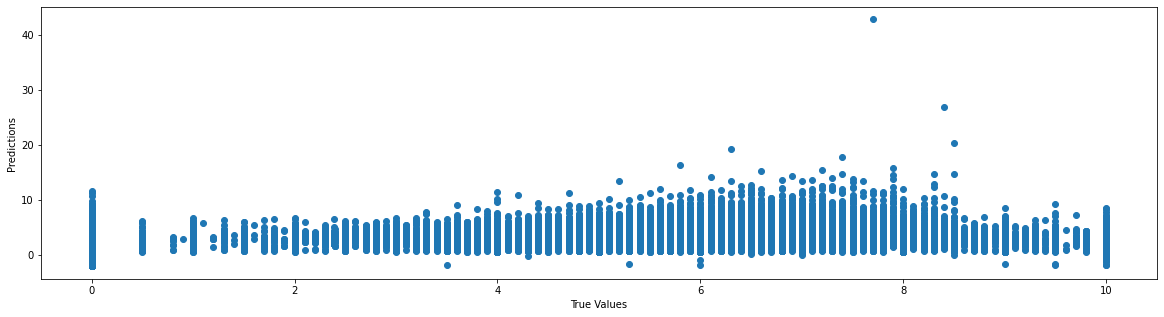

In [37]:
plt.figure(figsize=(20,5))
plt.scatter(y_test,reg_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# RANDOM FOREST

In [13]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor


In [14]:
rf= RandomForestRegressor()

In [15]:
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
print(mean_absolute_error(y_test, pred_rf))
print(np.sqrt(mean_squared_error(y_test, pred_rf)))

0.4688079948508544
1.0539302400430837


In [16]:
pred_rf

array([6.565875, 0.      , 0.      , ..., 6.455   , 5.865   , 6.37    ])

Text(0, 0.5, 'Predictions')

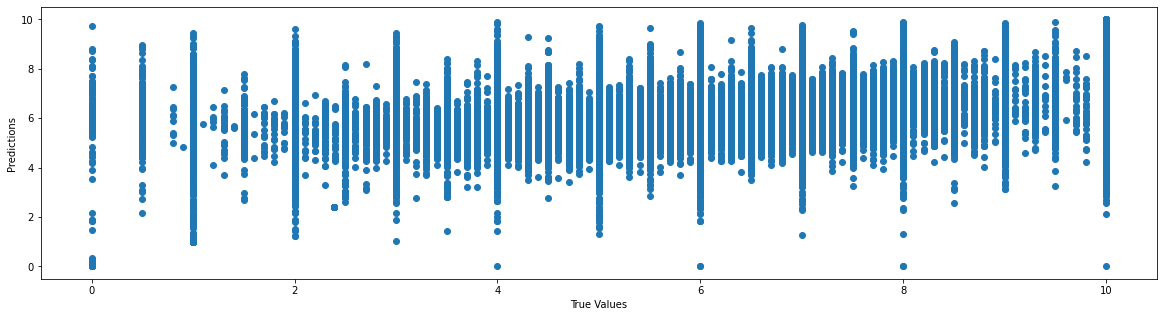

In [38]:
plt.figure(figsize=(20,5))
plt.scatter(y_test,pred_rf)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# BAGGING REGRESSOR

In [17]:
bag = BaggingRegressor()

In [18]:
bag.fit(X_train,y_train)
pred_bag = bag.predict(X_test)
print(mean_absolute_error(y_test, pred_bag))
print(np.sqrt(mean_squared_error(y_test, pred_bag)))

0.48963702456298897
1.0958058548113485


In [19]:
pred_bag

array([7.875, 0.   , 0.   , ..., 8.35 , 5.3  , 5.5  ])

Text(0, 0.5, 'Predictions')

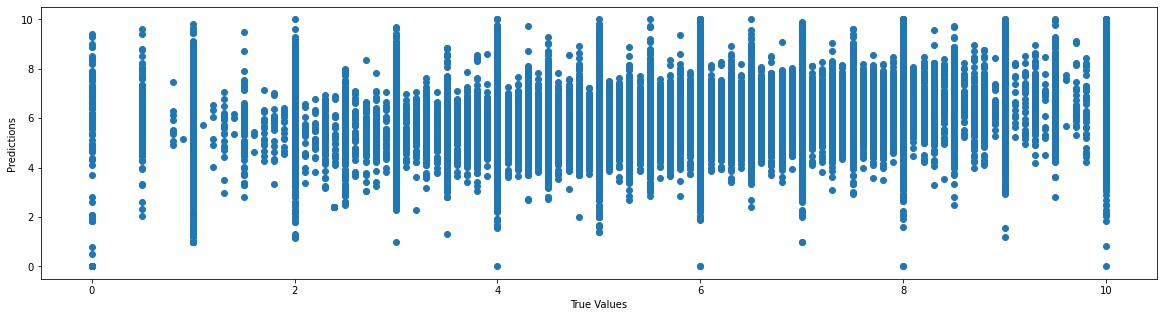

In [39]:
plt.figure(figsize=(20,5))
plt.scatter(y_test,pred_bag)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# KNeighborsRegressor

In [20]:
from sklearn import metrics

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)  #fit the model

KNeighborsRegressor()

In [21]:
pred_kn=model.predict(X_test) #make prediction on test set
np.sqrt(metrics.mean_squared_error(y_test,pred_kn)) #calculate rmse

1.5530228547729685

In [22]:
pred_kn

array([7.8 , 0.  , 0.  , ..., 6.86, 1.6 , 4.  ])

Text(0, 0.5, 'Predictions')

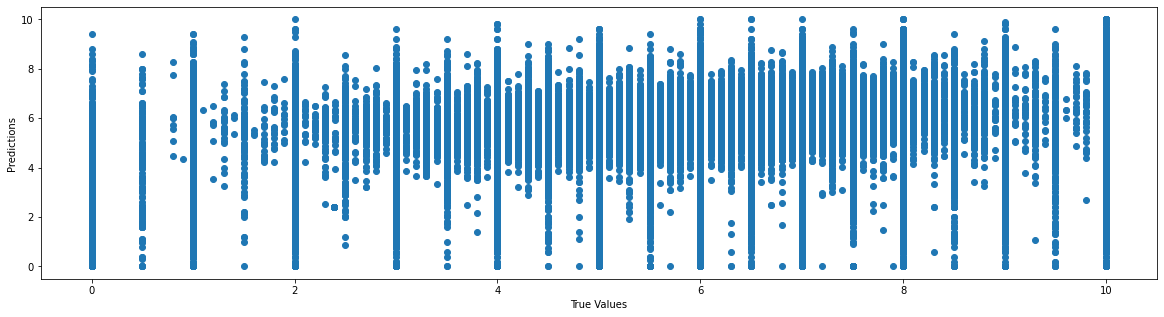

In [40]:
plt.figure(figsize=(20,5))
plt.scatter(y_test,pred_kn)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# DecisionTreeRegressor

In [23]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [24]:
# predicting a new value
  
#test the output by changing values, like 3750
y_pred_d = regressor.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred_d))

1.4670478668457594

Text(0, 0.5, 'Predictions')

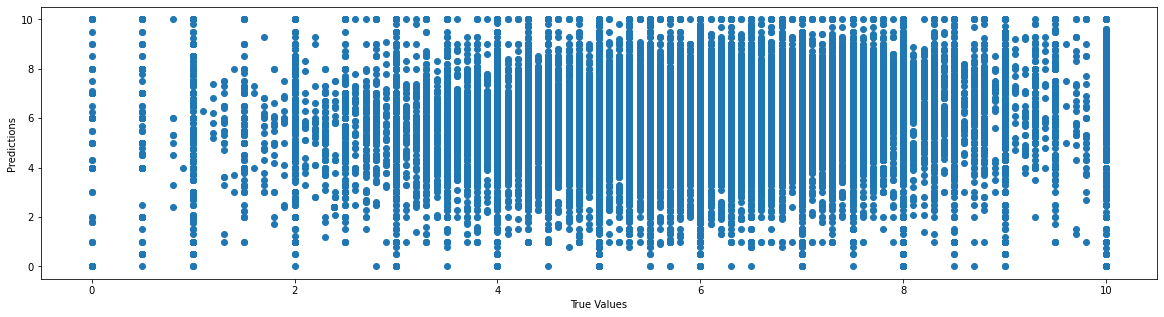

In [43]:
plt.figure(figsize=(20,5))
plt.scatter(y_test,y_pred_d)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# LASSO

In [25]:
ls=Lasso()
ls.fit(X_train,y_train)

Lasso()

In [26]:
pred_ls=ls.predict(X_test) #make prediction on test set
np.sqrt(metrics.mean_squared_error(y_test,pred_ls))

3.1360460017423244

Text(0, 0.5, 'Predictions')

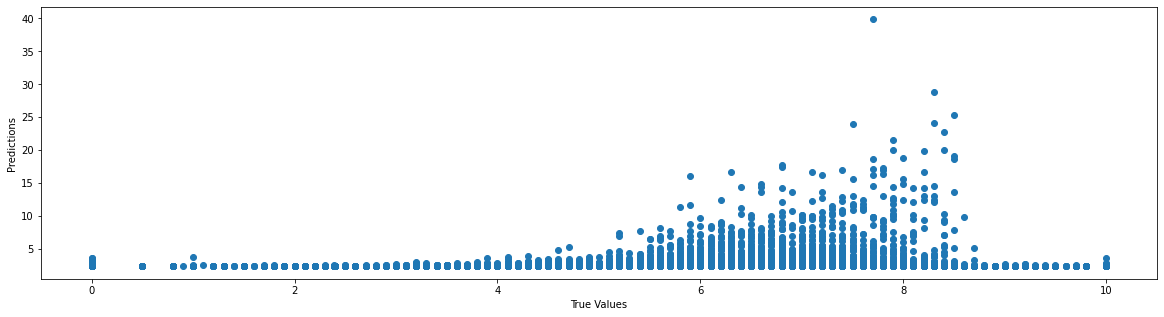

In [42]:
plt.figure(figsize=(20,5))
plt.scatter(y_test,pred_ls)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# RIDGE

In [31]:
Rid=Ridge(alpha=0.05)
Rid.fit(X_train,y_train)

Ridge(alpha=0.05)

In [32]:
pred_rid=Rid.predict(X_test) #make prediction on test set
np.sqrt(metrics.mean_squared_error(y_test,pred_rid))

2.873317441457379

Text(0, 0.5, 'Predictions')

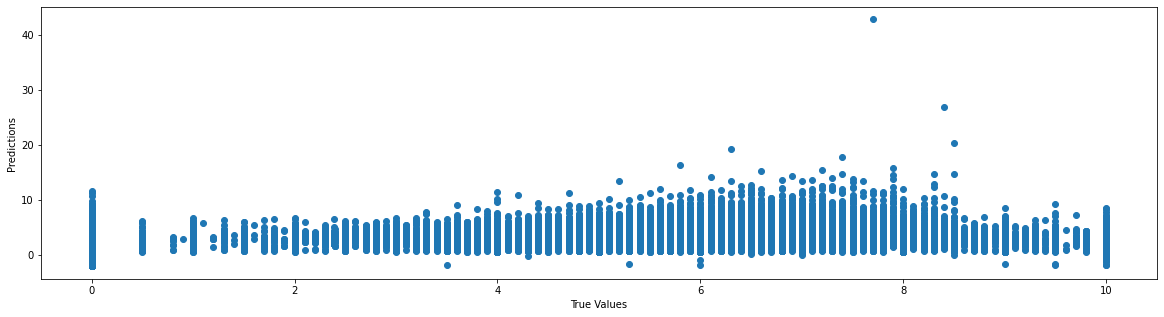

In [41]:
plt.figure(figsize=(20,5))
plt.scatter(y_test,pred_rid)
plt.xlabel('True Values')
plt.ylabel('Predictions')

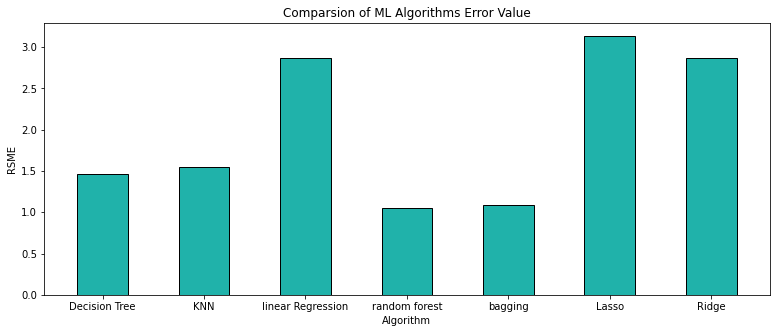

In [33]:
import matplotlib.pyplot as plt
#bar chart for model selection
plt.figure(figsize=(13,5))
algorithm = ['Decision Tree','KNN','linear Regression','random forest','bagging','Lasso','Ridge']
rmse = [1.467,1.55,2.87,1.05,1.09,3.136,2.87]
plt.bar(algorithm,rmse,color = 'lightseagreen', width = 0.5,edgecolor='black')
plt.title('Comparsion of ML Algorithms Error Value')
plt.xlabel('Algorithm')
plt.ylabel('RSME')
plt.show(block = True)
